# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [853]:
# Cargar todas las librerías

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as st

import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

## Cargar datos

In [854]:
# Carga los archivos de datos en diferentes DataFrames

df_megaline_calls = pd.read_csv('megaline_calls.csv')
df_megaline_internet = pd.read_csv('megaline_internet.csv')
df_megaline_messages = pd.read_csv('megaline_messages.csv')
df_megaline_plans = pd.read_csv('megaline_plans.csv')
df_megaline_users = pd.read_csv('megaline_users.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [855]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

df_megaline_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [856]:
# Imprime una muestra de los datos para las tarifas

df_megaline_plans.head(5)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [857]:
df_megaline_users.shape

(500, 8)

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Usuarios/as

In [858]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

df_megaline_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [859]:
# Imprime una muestra de datos para usuarios

df_megaline_users.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [860]:
df_megaline_users['churn_date'] = pd.to_datetime(df_megaline_users['churn_date'])

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [861]:
df_megaline_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    object        
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


## Llamadas

In [862]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

df_megaline_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [863]:
# Imprime una muestra de datos para las llamadas

df_megaline_calls.head(5)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [864]:
# Conviertiendo 'session_date' a datetime
df_megaline_calls['call_date'] = pd.to_datetime(df_megaline_calls['call_date'])
df_megaline_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Mensajes

In [865]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

df_megaline_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [866]:
# Imprime una muestra de datos para los mensajes

df_megaline_messages.head(5)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [867]:
# Conviertiendo 'message_date' a datetime
df_megaline_messages['message_date'] = pd.to_datetime(df_megaline_messages['message_date'])
df_megaline_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Internet

In [868]:
# Imprime la información general/resumida sobre el DataFrame de internet

df_megaline_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [869]:
# Imprime una muestra de datos para el tráfico de internet

df_megaline_internet.head(5)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [870]:
# Conviertiendo 'session_date' a datetime
df_megaline_internet['session_date'] = pd.to_datetime(df_megaline_internet['session_date'])
df_megaline_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [871]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

df_megaline_plans.head(5)  #Corregido tal y como se indicó 

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [872]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

df_megaline_calls['month'] = df_megaline_calls['call_date'].dt.month
df_megaline_calls.groupby(['user_id', 'month'])['call_date'].count() 

user_id  month
1000     12       16
1001     8        27
         9        49
         10       65
         11       64
                  ..
1498     12       39
1499     9        41
         10       53
         11       45
         12       65
Name: call_date, Length: 2258, dtype: int64

In [873]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

df_megaline_calls['duration'] = (df_megaline_calls['duration']).apply(np.ceil) 
groupcall=df_megaline_calls.groupby(['user_id', 'month'])['duration'].sum()

#merging_allnew['duration'] = (merging_allnew['duration']).apply(np.ceil) 
#groupcall=df_megaline_calls.groupby(['user_id', 'month'])['duration'].sum()

In [874]:
groupcall  # Se redondeó el valor antes del groupby tal y como se indicó

user_id  month
1000     12       124.0
1001     8        182.0
         9        315.0
         10       393.0
         11       426.0
                  ...  
1498     12       339.0
1499     9        346.0
         10       385.0
         11       308.0
         12       496.0
Name: duration, Length: 2258, dtype: float64

In [875]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

df_megaline_messages['month'] = df_megaline_messages['message_date'].dt.month
groupmen=df_megaline_messages.groupby(['user_id', 'month'])['message_date'].count() 

In [876]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

df_megaline_internet['month'] = df_megaline_internet['session_date'].dt.month

# Redondeando los gb hacia arriba 
df_megaline_internet['mb_used'] = (df_megaline_internet['mb_used']).apply(np.ceil) 
groupinter=df_megaline_internet.groupby(['user_id', 'month'])['mb_used'].sum()

In [877]:
merging_all = groupcall.to_frame().merge(groupmen, on = ['user_id', 'month'], how = 'outer') 
merging_all = merging_all.merge(groupinter, on = ['user_id', 'month'], how = 'outer') 
merging_all.fillna(0, inplace= True)
merging_all.head(20)

duration  message_date  mb_used
user_id month                                 
1000    12        124.0          11.0   1903.0
1001    8         182.0          30.0   6929.0
        9         315.0          44.0  13333.0
        10        393.0          53.0  22356.0
        11        426.0          36.0  18524.0
        12        412.0          44.0  19398.0
1002    10         59.0          15.0   6559.0
        11        386.0          32.0  19364.0
        12        384.0          41.0  14416.0
1003    12       1104.0          50.0  27069.0
1004    5         193.0           7.0   6554.0
        6         275.0          18.0  20702.0
        7         381.0          26.0  24547.0
        8         354.0          25.0  28015.0
        9         301.0          21.0  18874.0
        10        365.0          24.0  14564.0
        11        476.0          25.0  21882.0
        12        427.0          31.0  21410.0
1005    12        496.0          11.0  17164.0
1006    11         10.0          15.0   2072.0

In [878]:
# Obteniendo total de calls por usuario

grouptotalcalls=df_megaline_calls.groupby(['user_id', 'month'])['call_date'].count()
grouptotalcalls

user_id  month
1000     12       16
1001     8        27
         9        49
         10       65
         11       64
                  ..
1498     12       39
1499     9        41
         10       53
         11       45
         12       65
Name: call_date, Length: 2258, dtype: int64

In [879]:
merging_all = merging_all.merge(grouptotalcalls, on = ['user_id', 'month'], how = 'outer').reset_index() 
merging_all

,user_id,month,duration,message_date,mb_used,call_date
0,1000,12,124.0,11.0,1903.0,16.0
1,1001,8,182.0,30.0,6929.0,27.0
2,1001,9,315.0,44.0,13333.0,49.0
3,1001,10,393.0,53.0,22356.0,65.0
4,1001,11,426.0,36.0,18524.0,64.0
...,...,...,...,...,...,...
2288,1349,12,0.0,61.0,13052.0,NaN
2289,1361,5,0.0,2.0,1523.0,NaN
2290,1482,10,0.0,2.0,0.0,NaN
2291,1108,12,0.0,0.0,235.0,NaN


In [914]:
merging_allnew = merging_all.rename({'user_id': 'user_id', 'month': 'month','call_date': 'calls', 'duration': 'duration','message_date': 'totalmessages', 'mb_used': 'mg_used'}, axis=1)

# Convirtiendo los mb a gb tal y como se indicó
merging_allnew['mg_used'] =  (merging_allnew['mg_used']/1024)

merging_allnew['mg_used'] = (merging_allnew['mg_used']).apply(np.ceil) 

merging_allnew = merging_allnew.fillna(0)

merging_allnew['calls'] = (merging_allnew['calls']).apply(np.ceil) 

merging_allnew.head(20)

,user_id,month,duration,totalmessages,mg_used,calls
0,1000,12,124.0,11.0,2.0,16.0
1,1001,8,182.0,30.0,7.0,27.0
2,1001,9,315.0,44.0,14.0,49.0
3,1001,10,393.0,53.0,22.0,65.0
4,1001,11,426.0,36.0,19.0,64.0
5,1001,12,412.0,44.0,19.0,56.0
6,1002,10,59.0,15.0,7.0,11.0
7,1002,11,386.0,32.0,19.0,55.0
8,1002,12,384.0,41.0,15.0,47.0
9,1003,12,1104.0,50.0,27.0,149.0


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [881]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

merging_allnew =  merging_allnew[['user_id', 'month', 'calls', 'duration', 'totalmessages', 'mg_used' ]]

In [882]:
#df_megaline_users.columns
df_megaline_users.head(5)
#merging_allnew.columns
df_megaline_users['churn_date'] = df_megaline_users['churn_date'].dt.month
df_megaline_users.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [913]:
# Añade la información de la tarifa

merging_allnew = merging_allnew.merge(df_megaline_users)

merging_allnew2 =  merging_allnew[['user_id', 'month', 'calls', 'duration', 'totalmessages', 'mg_used', 'plan', 'churn_date' ]]
merging_allnew2 = pd.merge(merging_allnew2, df_megaline_plans, left_on='plan', right_on='plan_name')
merging_allnew2.fillna(0, inplace= True)
merging_allnew2['duration'] =  merging_allnew2['duration'].astype(int) # Convertida la columna de duration
merging_allnew2['mg_used'] =  merging_allnew2['mg_used'].astype(int)  # Convertida la columna de uso de internet
merging_allnew2.head(25) 

,user_id,month,calls,duration,totalmessages,mg_used,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12,16,124,11,2,ultimate,0.0,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1006,11,2,10,15,2,ultimate,12.0,1000,30720,3000,70,7,0.01,0.01,ultimate
2,1006,12,9,59,139,31,ultimate,12.0,1000,30720,3000,70,7,0.01,0.01,ultimate
3,1008,10,71,476,21,17,ultimate,0.0,1000,30720,3000,70,7,0.01,0.01,ultimate
4,1008,11,63,446,37,23,ultimate,0.0,1000,30720,3000,70,7,0.01,0.01,ultimate
5,1008,12,85,634,26,14,ultimate,0.0,1000,30720,3000,70,7,0.01,0.01,ultimate
6,1011,6,19,118,21,7,ultimate,0.0,1000,30720,3000,70,7,0.01,0.01,ultimate
7,1011,7,63,499,53,21,ultimate,0.0,1000,30720,3000,70,7,0.01,0.01,ultimate
8,1011,8,61,486,54,21,ultimate,0.0,1000,30720,3000,70,7,0.01,0.01,ultimate
9,1011,9,73,484,60,16,ultimate,0.0,1000,30720,3000,70,7,0.01,0.01,ultimate


In [884]:
#df_result

In [885]:
#df_result1

In [886]:
#df_result2

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [887]:
# Cálcula el ingreso mensual para cada usuario

merging_allnew2['total_minutes_fee'] = np.where( merging_allnew2['plan_name'] == 'surf', (merging_allnew2['duration'] - merging_allnew2['minutes_included']) * 0.03, (merging_allnew2['duration'] - merging_allnew2['minutes_included']) * 0.01 )
merging_allnew2['total_minutes_fee'] = merging_allnew2['total_minutes_fee'].clip(lower = 0)

merging_allnew2['total_message_fee'] = np.where( merging_allnew2['plan_name'] == 'surf', (merging_allnew2['totalmessages'] - merging_allnew2['messages_included']) * 0.03, (merging_allnew2['totalmessages'] - merging_allnew2['messages_included']) * 0.01 )
merging_allnew2['total_message_fee'] = merging_allnew2['total_message_fee'].clip(lower = 0)

merging_allnew2['total_megas_fee'] = np.where( merging_allnew2['plan_name'] == 'surf', (merging_allnew2['mg_used'] - merging_allnew2['mb_per_month_included']) * 10, (merging_allnew2['mg_used'] - merging_allnew2['mb_per_month_included']) * 7)

merging_allnew2['total_megas_fee'] = merging_allnew2['total_megas_fee'].clip(lower = 0)

merging_allnew2['total_to_pay'] = merging_allnew2['total_minutes_fee']+merging_allnew2['total_message_fee']+merging_allnew2['total_megas_fee']+ merging_allnew2['usd_monthly_pay']


In [888]:
merging_allnew2.sample(20)

,user_id,month,calls,duration,totalmessages,mg_used,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,total_minutes_fee,total_message_fee,total_megas_fee,total_to_pay
173,1124,12,63,447.0,93,6,ultimate,0.0,1000,30720,3000,70,7,0.01,0.01,ultimate,0.00,0.00,0,70.00
1491,1251,5,70,567.0,39,21,surf,0.0,50,15360,500,20,10,0.03,0.03,surf,2.01,0.00,0,22.01
2291,1349,11,0,0.0,72,17,surf,0.0,50,15360,500,20,10,0.03,0.03,surf,0.00,0.66,0,20.66
1221,1156,11,85,645.0,0,18,surf,0.0,50,15360,500,20,10,0.03,0.03,surf,4.35,0.00,0,24.35
1799,1336,4,88,535.0,64,16,surf,0.0,50,15360,500,20,10,0.03,0.03,surf,1.05,0.42,0,21.47
2076,1418,11,37,233.0,0,35,surf,0.0,50,15360,500,20,10,0.03,0.03,surf,0.00,0.00,0,20.00
161,1112,10,96,708.0,33,10,ultimate,0.0,1000,30720,3000,70,7,0.01,0.01,ultimate,0.00,0.00,0,70.00
2225,1491,6,64,394.0,54,11,surf,9.0,50,15360,500,20,10,0.03,0.03,surf,0.00,0.12,0,20.12
1880,1359,6,57,498.0,0,22,surf,0.0,50,15360,500,20,10,0.03,0.03,surf,0.00,0.00,0,20.00
528,1390,10,92,669.0,0,13,ultimate,0.0,1000,30720,3000,70,7,0.01,0.01,ultimate,0.00,0.00,0,70.00


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

In [889]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

merging_allnew2.groupby(['plan_name', 'month'])['calls'].mean()

plan_name  month
surf       1        30.000000
           2        40.666667
           3        46.434783
           4        48.880000
           5        55.701299
           6        59.474227
           7        63.157025
           8        57.561728
           9        58.108247
           10       60.350211
           11       59.120141
           12       65.452830
ultimate   1        28.000000
           2        58.285714
           3        46.000000
           4        47.523810
           5        57.586207
           6        52.170213
           7        58.694915
           8        60.070423
           9        61.046512
           10       63.783019
           11       62.362205
           12       64.900662
Name: calls, dtype: float64

In [911]:
# Trazando gráfico de barras 

df = pd.DataFrame()

mis_booleans = ( merging_allnew2['plan_name']=='surf' )
dfg = merging_allnew2[mis_booleans].groupby(['month'])['calls'].mean() 
df['surf'] = dfg.values

mis_booleans = ( merging_allnew2['plan_name']=='ultimate' )
dfg = merging_allnew2[mis_booleans].groupby(['month'])['calls'].mean() 
df['ultimate'] = dfg.values
df.index = np.arange(1, len(df) + 1)
df

,surf,ultimate
1,30.000000,28.000000
2,40.666667,58.285714
3,46.434783,46.000000
4,48.880000,47.523810
5,55.701299,57.586207
6,59.474227,52.170213
7,63.157025,58.694915
8,57.561728,60.070423
9,58.108247,61.046512
10,60.350211,63.783019


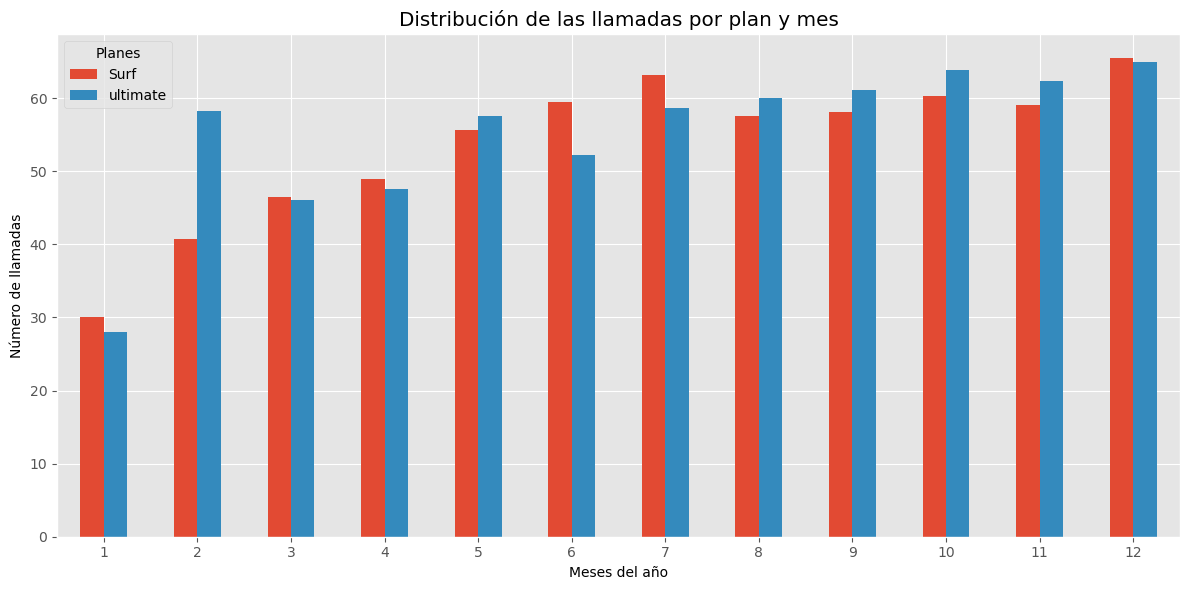

In [912]:
plt.style.use('ggplot')
df.plot(kind='bar', figsize = (12, 6), rot= 0)
plt.xlabel("Meses del año")
plt.ylabel("Número de llamadas")
plt.title("Distribución de las llamadas por plan y mes") 
plt.legend(['Surf', 'ultimate'], title='Planes')
plt.show()

In [909]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

df2 = pd.DataFrame()

mis_booleans = ( merging_allnew2['plan_name']=='surf' )
dfg = merging_allnew2[mis_booleans].groupby(['month'])['duration'].mean().apply(np.ceil) 
df2['surf'] = dfg.values


mis_booleans = ( merging_allnew2['plan_name']=='ultimate' )
dfg = merging_allnew2[mis_booleans].groupby(['month'])['duration'].mean().apply(np.ceil) 
df2['ultimate'] = dfg.values
df2.index = np.arange(1, len(df2) + 1)
df2

,surf,ultimate
1,203.0,194.0
2,297.0,404.0
3,330.0,305.0
4,352.0,337.0
5,400.0,407.0
6,432.0,371.0
7,450.0,428.0
8,411.0,422.0
9,415.0,438.0
10,430.0,451.0


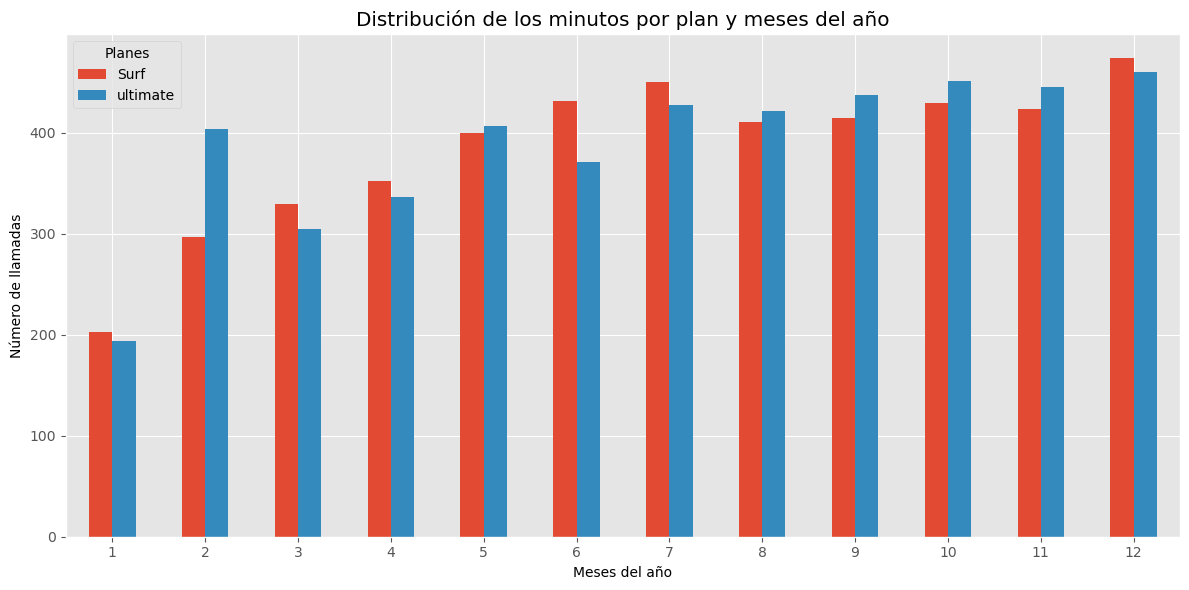

In [910]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

plt.style.use('ggplot')

df2.plot(kind='bar', figsize = (12, 6), rot = 0)
plt.xlabel("Meses del año")
plt.ylabel("Número de llamadas")
plt.title("Distribución de los minutos por plan y meses del año") 
plt.legend(['Surf', 'ultimate'], title='Planes')
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [894]:
# Calcula la media y la varianza de la duración mensual de llamadas.

df = merging_allnew2.groupby(['month'])['calls'].agg(['mean', 'var'])
df

,mean,var
month,,
1,28.666667,247.866667
2,48.375000,1140.250000
3,46.285714,903.798319
4,48.478873,822.538833
5,56.216981,1064.438185
6,57.090278,827.341443
7,61.694444,1219.844662
8,58.326180,1052.470734
9,59.010714,949.372645


In [907]:
mis_booleans = (merging_allnew2['plan_name']=='surf')
dfsurf = merging_allnew2[mis_booleans].groupby('month')['duration'].sum()

mis_booleans = (merging_allnew2['plan_name']=='ultimate')
dfulti = merging_allnew2[mis_booleans].groupby('month')['duration'].sum()
df = pd.DataFrame({'surf': dfsurf.values, 'ultimate': dfulti.values})
df

,surf,ultimate
0,406.0,774.0
1,2673.0,2822.0
2,7590.0,3651.0
3,17577.0,7074.0
4,30768.0,11781.0
5,41836.0,17435.0
6,54448.0,25197.0
7,66438.0,29922.0
8,80360.0,37626.0
9,101846.0,47778.0


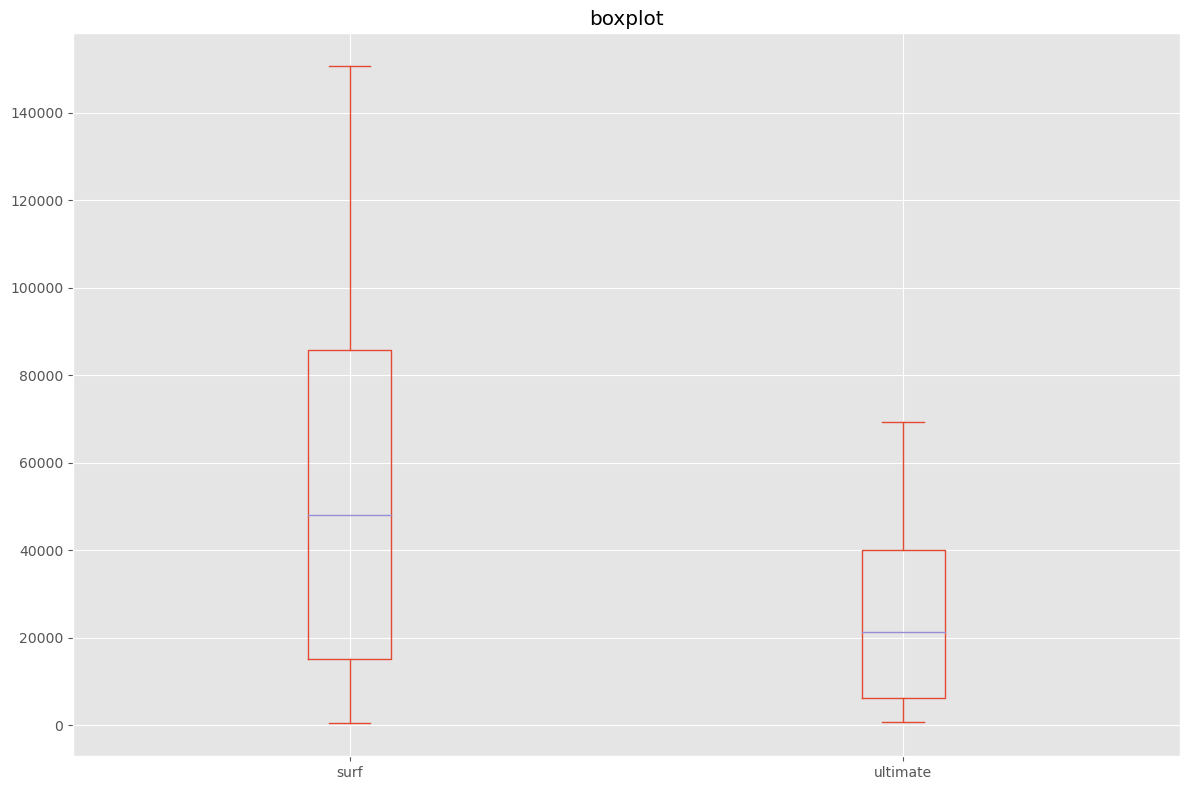

In [908]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

plt.style.use('ggplot')
# Set the figure size
plt.rcParams["figure.figsize"] = [12, 8]
plt.rcParams["figure.autolayout"] = True

# Plot the dataframe
ax = df[['surf', 'ultimate']].plot(kind='box', title='boxplot')
ax = fig.add_subplot(111)
ax.set_title('Distribución de la duración mensual de llamadas')
ax.set_xlabel('Duración')
ax.set_ylabel('Cantidad de llamadas')
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

### Mensajes

<Axes: title={'center': 'Messages by plans and month'}, xlabel='month', ylabel='Amount of messages'>

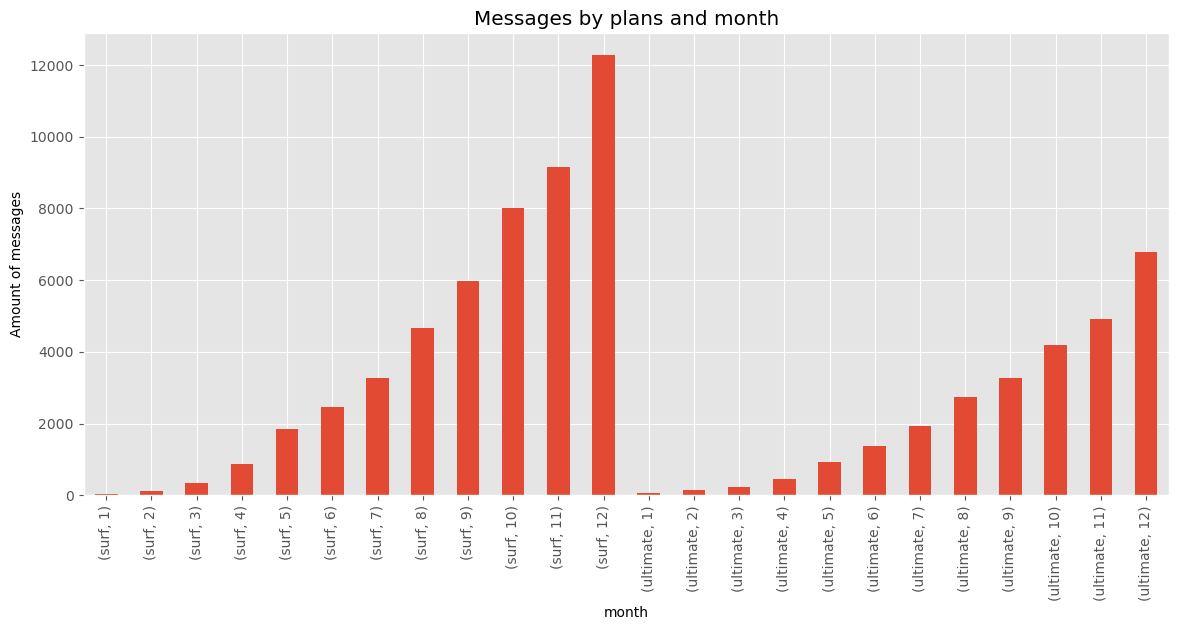

In [896]:
# Compara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

plt.style.use('ggplot')
dfg = merging_allnew2.groupby(['plan_name', 'month'])['totalmessages'].sum()
dfg.plot(kind='bar', title='Messages by plans and month', ylabel='Amount of messages', xlabel='month', figsize=(14, 6))

<Axes: title={'center': 'Megas used by plans and month'}, xlabel='month', ylabel='Amount of megas'>

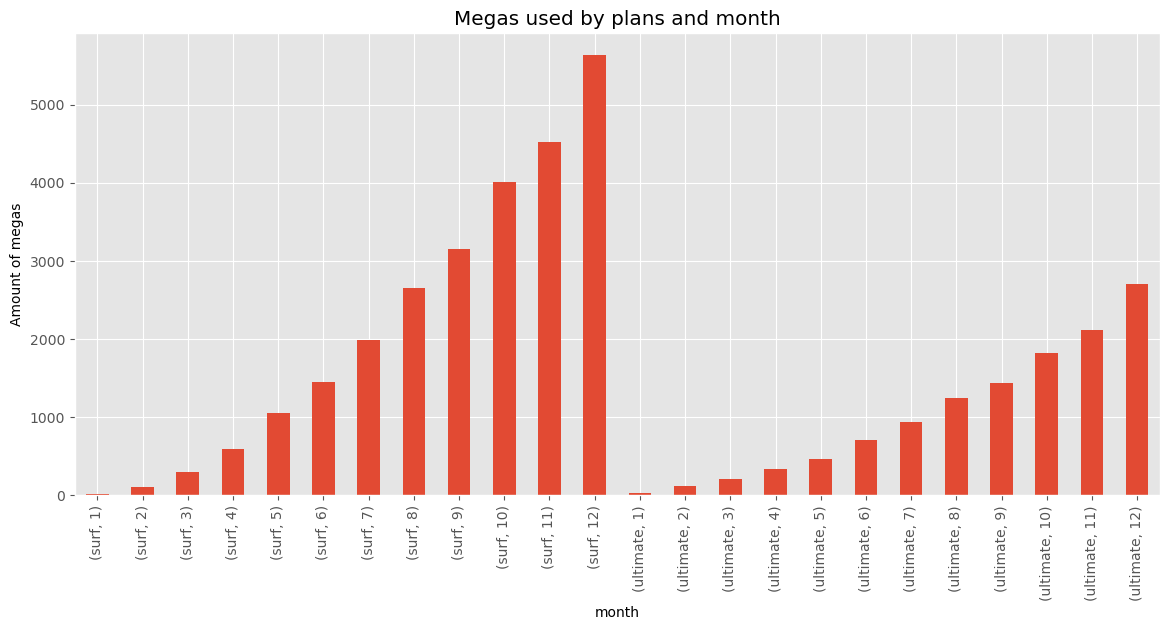

In [897]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

plt.style.use('ggplot')
dfg = merging_allnew2.groupby(['plan_name', 'month'])['mg_used'].sum()
dfg.plot(kind='bar', title='Megas used by plans and month', ylabel='Amount of megas', xlabel='month', figsize=(14, 6))

In [898]:
x = merging_allnew2[merging_allnew2['plan_name'] == 'surf'].groupby(['month'])['mg_used'].sum()
y = merging_allnew2[merging_allnew2['plan_name'] == 'ultimate'].groupby(['month'])['mg_used'].sum()
y.values

array([  27,  117,  214,  331,  467,  706,  940, 1240, 1431, 1823, 2112,
       2703])

In [905]:
labels =  [1,2,3,4,5,6,7,8,9,10,11,12]
dataa = {'Surf': x.values,
        'Ultimate': y.values,
        'axis': labels
       }
df = pd.DataFrame(dataa)
df.index = np.arange(1, len(df) + 1)

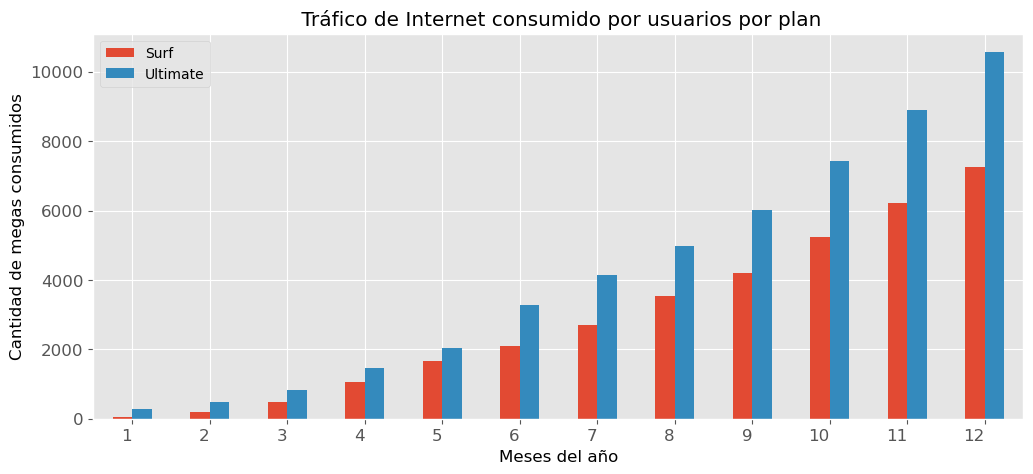

In [906]:
plt.style.use('ggplot')

ax = df[['Surf', 'Ultimate']].plot(kind='bar', title =" Tráfico de Internet consumido por usuarios por plan",figsize=(12,5),legend=True, fontsize=12)
ax.set_xlabel("Meses del año",fontsize=12)
ax.set_ylabel("Cantidad de megas consumidos",fontsize=12)
plt.setp(ax.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show()

In [900]:
#df

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

A partir del análisis del gráfico sobre la cantidad de mensajes que tienden a  enviar los usuarios, se observa que existen diferencias entre cantidad enviada por usuarios del plan Surf y la cantidad enviada por usuarios del plan Ultimate, de tal modo que, en todos los meses la cantidad de mensajes enviados de los usuarios del plan Surf supera al de los usuarios del plan ultimate, no obstante, la cantidad mensual se va incrementando paulatinamente en la medida en que transcurren los meses del año para ambos planes. 

In [901]:
#listado = merging_allnew2.query('churn_date.notnull() & churn_date < month')['total_to_pay'].index
#merging_allnew2.loc[merging_allnew2.index.isin(listado), 'total_to_pay'] = 0

#merging_allnew2['total_to_pay'].min()

#merging_allnew2[merging_allnew2['total_to_pay'] ==0].sample(20)

### Internet

Luego de analizado el gráfico de barra del consumo de megas por navegación de internet por parte de los usuarios, se aprecia que existen diferencias entre el tráfico de internet consumido por usuarios tanto de plan Surf así como los pertenecientes al plan Ultimate, observándose que, para clientes de ambos planes se va incrementando el tráfico a medida que transcurre el año, siendo mayor el incremento para aquellos clientes del plan surf, pudiendo ser debido a que es un plan más económico y asequible para un mayor número de personas. En ambos planes el pico máximo de consumo se alcanza en el mes de diciembre.

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]



## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [902]:
x = merging_allnew2[merging_allnew2['plan_name'] == 'surf'].groupby(['month'])['total_to_pay'].sum()

mis_booleans = ( merging_allnew2['plan_name']=='ultimate')
y = merging_allnew2[mis_booleans].groupby(['month'])['total_to_pay'].sum()

In [903]:
#labels =  [1,2,3,4,5,6,7,8,9,10,11,12]
dataa = {'Surf': x.values,
        'Ultimate': y.values #,
        #'axis': labels
       }
df = pd.DataFrame(dataa)
df.index = np.arange(1, len(df) + 1)

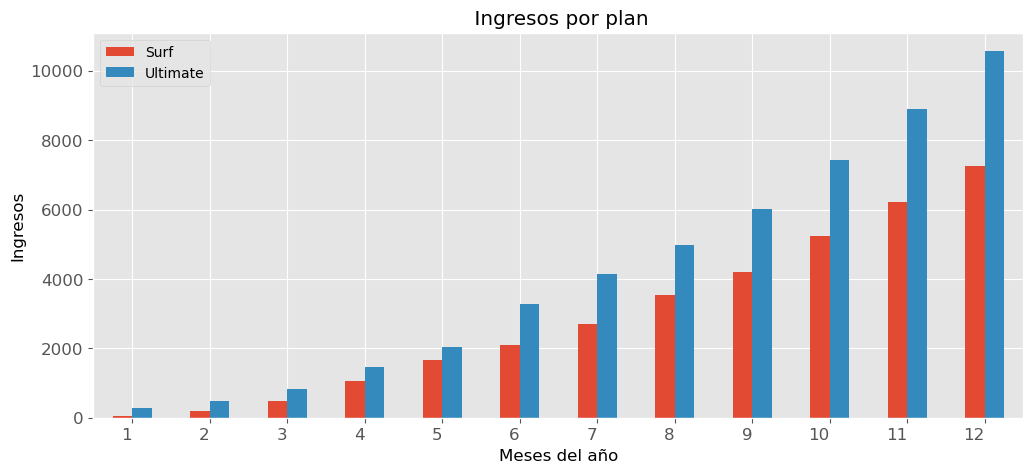

In [904]:
plt.style.use('ggplot')
ax = df[['Surf', 'Ultimate']].plot(kind='bar', title =" Ingresos por plan",figsize=(12,5),legend=True, fontsize=12)
ax.set_xlabel("Meses del año",fontsize=12)
ax.set_ylabel("Ingresos",fontsize=12)
plt.setp(ax.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show()

In [833]:
x = merging_allnew2[merging_allnew2['plan_name'] == 'surf'].groupby(['month'])['total_to_pay'].sum()
#x

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

Luego de analizado el gráfico sobre el ingreso mensual por plan, se aprecia que existe una diferencia notable en cuanto a los ingresos de ambos planes, observándose que los ingresos obtenidos por los usuarios inscritos en el plan Ultimate son superiores a los ingresos obtenidos por los usuarios inscritos en el plan Surf analizados mes a mes. El comportamiento en ambos grupos es similar, siendo con tendencia creciente, aunque el ingreso de usuarios ultimate es superior en todos los meses a los de usuarios surf, siendo el mes de mayor ingreso, el mes de diciembre, obteniéndose ingresos por valor de 14316332.66 (unidades en miles de pesos).

## Prueba las hipótesis estadísticas

1- [Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

### Definiendo las hipótesis:
H_0: Los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf son iguales.

H_1: Los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf son diferentes.

### Estadístico de prueba:


### Región de rechazo:

Estadístico t-test utilizado

alpha = 0.05 

In [845]:
# Prueba las hipótesis

x = merging_allnew2[merging_allnew2['plan_name'] == 'surf'].groupby(['month'])['total_to_pay'].sum()
y = merging_allnew2[merging_allnew2['plan_name'] == 'ultimate'].groupby(['month'])['total_to_pay'].sum()

st.levene(x, y)

LeveneResult(statistic=0.16399878112473737, pvalue=0.6902735568693985)

El resultado del test de levene arroja 1.52 en el estadístico de prueba y 0.22 en el p-value, siendo éste último mayor que el nivel de significancia, tras lo cual no hay evidencia suficiente para rechazar la hipótesis nula, por tanto las varianzas de las poblaciones son iguales.

In [916]:
st.ttest_ind(x, y, equal_var = True)

Ttest_indResult(statistic=-1.0776808579126587, pvalue=0.29285164980808265)

El parámetro equal_va se mantiene en True ya que la prueba de levene arrojó que las varianzas de las poblaciones son iguales.

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

Se aplicó la prueba T-test, obteniéndose un p-valor de 0.29 y -1.07 para el estadístico, notando que el p-valor es mayor que el nivel de significancia, tras lo cual no hay evidencia suficiente para rechazar la hipótesis nula.

2-[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

# Prueba las hipótesis

### Definiendo las hipótesis:
H_0: Los ingresos promedio de los usuarios que viven en NY-NJ es igual al de otros usuarios de otras regiones.

H_1: Los ingresos promedio de los usuarios que viven en NY-NJ es diferente al de otros usuarios de otras regiones.

### Estadístico de prueba:


### Región de rechazo:

Estadístico t-test utilizado
alpha = 0.05

In [840]:
merging_allnew2 = merging_allnew2.merge(df_megaline_users)

contain_values = merging_allnew2[merging_allnew2['city'].str.contains('NY-NJ')]
groupinter = contain_values.groupby(['month'])['total_to_pay'].sum()
x =groupinter

contain_valuess = merging_allnew2[~merging_allnew2['city'].str.contains('NY-NJ')]
groupinterr = contain_valuess.groupby(['month'])['total_to_pay'].sum()
y =groupinterr

st.levene(x, y)

LeveneResult(statistic=8.907318211068825, pvalue=0.007948514464978376)

Al aplicar el test de levene se obtiene que el valor del estadístico de prueba es 8.90 y 0.007 en el p-value, siendo elte último menor que el nivel de significancia previamente establecido (0.05), tras lo cual se puede decir que se rechaza la hipóteis nula de levene, o sea, las varianzas de las poblaciones son diferentes. 

In [841]:
st.ttest_ind(x, y, equal_var = False)

Ttest_indResult(statistic=-4.556535671622617, pvalue=0.0009724342343561459)

Se aplicó la prueba T-test, obteniéndose -1.16 en el estadístico y 0.26 para el p-value, notando que el p-valor es mayor que el nivel de significancia, tras lo cual se rechaza la hipótesis nula. 

## Conclusión general

1- Se obtuvo como resultado que a partir del análisis del gráfico sobre la cantidad de mensajes que tienden a enviar los usuarios, se observa que existen diferencias entre cantidad enviada por usuarios del plan Surf y la cantidad enviada por usuarios del plan Ultimate, de tal modo que, en todos los meses la cantidad de mensajes enviados de los usuarios del plan Surf supera al de los usuarios del plan ultimate, no obstante, la cantidad mensual se va incrementando paulatinamente en la medida en que transcurren los meses del año para ambos planes.

2- También se obtuvo luego de analizado el gráfico de barra del consumo de megas por navegación de internet por parte de los usuarios, se aprecia que existen diferencias entre el tráfico de internet consumido por usuarios tanto de plan Surf así como los pertenecientes al plan Ultimate, observándose que, para clientes de ambos planes se va incrementando el tráfico a medida que transcurre el año, siendo mayor el incremento para aquellos clientes del plan surf, pudiendo ser debido a que es un plan más económico y asequible para un mayor número de personas. En ambos planes el pico máximo de consumo se alcanza en el mes de diciembre.

3- Luego de analizado el gráfico sobre el ingreso mensual por plan, se aprecia que existe una diferencia notable en cuanto a los ingresos de ambos planes, observándose que los ingresos obtenidos por los usuarios inscritos en el plan Ultimate son superiores a los ingresos obtenidos por los usuarios inscritos en el plan Surf analizados mes a mes. El comportamiento en ambos grupos es similar, siendo con tendencia creciente, aunque el ingreso de usuarios ultimate es superior en todos los meses a los de usuarios surf, siendo el mes de mayor ingreso, el mes de diciembre, obteniéndose ingresos por valor de 14316332.66 (unidades en miles de pesos).

4- Adicionalemente, se aplicó la prueba T-test, obteniéndose un p-valor de 0.29 y 1.07 para el estadístico, notando que el p-valor es mayor que el nivel de significancia, tras lo cual no hay evidencia suficiente para rechazar la hipótesis nula. 

5- Por último, Se aplicó la prueba T-test, obteniéndose -1.16 en el estadístico y 0.26 para el p-value, observándose que el p-valor es mayor que el nivel de significancia, tras lo cual se rechaza la hipótesis nula.   